# Curso de Física Computacional
## Uso de widgets con ipython
<img src="https://raw.githubusercontent.com/jupyter/nature-demo/master/images/jupyter-logo.png" width="350px" style="margin: 20px auto;">

Para trabajar con la librería de graficación matplotlib, es necesario utilizar <b>comandos mágicos</b>.

<br/>
<b> %matplotlib </b>

Lo que nos configura matplotlib para trabajar interactivamente.
<br>
Esta función permite activar el soporte interactivo de matplotlib en cualquier momento durante una sesión de IPython.
<br/>
<br/>
Para habilitar el uso en línea con el IPython Notebook escribimos:
<br/>
<br/>
<b>%matplotlib inline</b>

Iniciamos el código dentro del notebook de Jupyter, llamando a las librerías numpy, scipy y matplotlib como lo hemos venido realizando anteriormente.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

## Los widgets en Jupyter
Los notebooks de Jupyter "cobran vida" cuando se utilizan widgets interactivos.

El usuario puede visualizar y controlar los cambios en los datos. El aprendizaje se convierte en una experiencia inmersiva, además de divertida.

Para ello es necesario importarlos antes de utilizarlos:

In [2]:
from ipywidgets import interact

# Repaso de lo que hemos visto

Un sistema de EDOs es usualmente formulado en forma estándar antes de ser resuelto numéricamente con Python. La forma estándar es:

$$ y' = f(y,t) $$
donde

$$y=[y_{1}(t),y_{2}(t),\ldots,y_{n}(t)]$$

y $f$ es una función que determina las derivadas de la función $y_{i}(t)$.
<br/>

Para resolver la EDO necesitamos conocer la función $f$ y una condición inicial, $y(0)$. Nótese que EDOs de orden superior siempre pueden ser escritas en esta forma introduciendo nuevas variables para las derivadas intermedias.

Una vez definida la función $f$ y el arreglo $y_{0}$, podemos usar la función <i>odeint</i>:

$$ y_{t} = odeint(f,y_{0},t)$$

donde $t$ es un arreglo con las coordenadas temporales para las que se resolverá el sistema de EDOs. El resultado $y_{t}$ es un arreglo con una línea para cada punto de tiempo $t$, y donde cada columna corresponde a una solución $y_{i}(t)$ para ese tiempo.

# Ejemplo
La ecuación de movimiento para el oscilador amortiguado es:

$$\dfrac{d^{2} x}{dt^{2}} + 2 \zeta \omega_{0} \dfrac{dx}{dt} + \omega_{0}^{2} x = 0$$

donde $x$ es la posición del oscilador, $\omega_{0}$ la frecuencia, y $\zeta$ es el factor de amortiguamiento.

Para escribir esta 2-EDO en la forma estándar, introducimos $p= dx/dt$

$$
\begin{align*}
\dfrac{dx}{dt} &= p \\
\dfrac{dp}{dt} &= - 2 \zeta \omega_{0} p - \omega^{2} x
\end{align*}
$$

En la implementación de este ejemplo agregaremos algunos argumentos extras a la función del lado derecho de la EDO, en lugar de usar variables globales. Como consecuencia de los argumentos extra, necesitamos pasar un argumento clave <b>args</b> a la función <b>odeint</b>

## Definimos la función

Escribimos la función en su forma estándar de 1-EDO

In [3]:
def F(y, t, zeta, w0):
    F = np.zeros((2), dtype='float64')
    F[0] = y[1]
    F[1] = -2 * zeta * w0 * y[1] - w0**2 * y[0]
    return F

## La información que falta

Establecemos el conjunto  de condiciones iniciales, el intervalo de tiempo, así como el valor de la frecuencia.

In [4]:
y0 =np.array([ 1.0, 0.0])

t = np.linspace(0, 6, 500)

w0 = 2 * np.pi * 1.0

## Hacemos la llamada a la función odeint

En este ejercicio, estamos usando diferentes valores de $w_{0}$, tal que

$$w_{0} = 0.0, 0.1, 0.4, 5.0$$

In [5]:
y1 = odeint( F, y0, t, args =(0.0, w0))
y2 = odeint( F, y0, t, args =(0.1, w0))
y3 = odeint( F, y0, t, args =(0.4, w0))
y4 = odeint( F, y0, t, args =(5.0, w0))

## Rutina de graficación

Implementamos la conocida rutina de graficación, en este caso, tendremos una gráfica por cada valor del coeficiente de amortiguamiento, que se visualiza en la gráfica de salida.

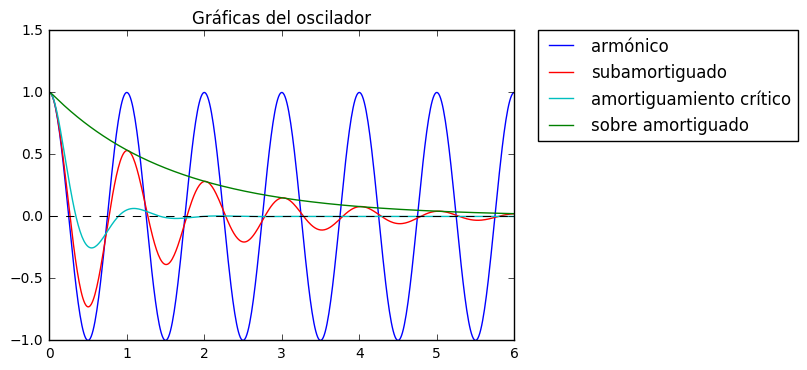

In [6]:
plt.plot( t, y1[:,0], 'b', label ='armónico')
plt.plot( t, y2[:,0], 'r', label ='subamortiguado')
plt.plot( t, y3[:,0], 'c', label ='amortiguamiento crítico')
plt.plot( t, y4[:,0], 'g', label ='sobre amortiguado')
plt.title(u'Gráficas del oscilador')
plt.axhline(y=0, ls='dashed', lw=0.75, color='k')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Pero ¿dónde quédo lo interactivo y divertido?

Para la exploración interactiva de los resultados, implementaremos el uso de un widget que nos permitirá modificar el valor del coeficiente de amortiguamiento sin necesidad de anotar una nueva llamada a la función <b>odeint</b>.

Siendo necesario crear una función con los elementos que ya tenemos, dejando como parámetro precisamente el coeficiente de amortiguamiento <b>amort</b>

In [7]:
def creafuncion(amort):
    y0 =np.array([ 1.0, 0.0])
    t = np.linspace(0, 6, 500)
    w0 = 2 * np.pi * 1.0
    y = odeint( F, y0, t, args =(amort, w0))
    plt.plot( t, y[:,0], 'b')
    plt.title(u'Gráfica del oscilador con el widget')
    plt.axhline(y=0, ls='dashed', lw=0.75, color='k')
    plt.show()

## Ahora incluimos el widget

Usaremos un control deslizable, que dentro del entorno de Jupyter se conoce como <b>slider</b>, y será el que nos modifique el valor del coeficiente de amortiguamiento.

Veremos que el resultado del cambio se hace en automático, sin necesidad de aplicar una actualización en el navegador o en la gráfica.

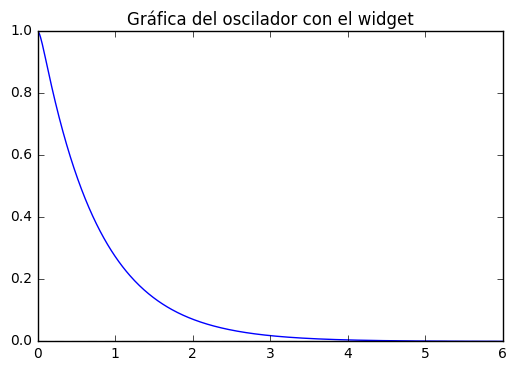

<function __main__.creafuncion>

In [8]:
interact(creafuncion, amort = [0.0, 5.0, 0.05])

# Ejercicio de circuito RLC

Ahora veamos otro ejercicio en donde tenemos un circuito RLC conectado a una fuente de voltaje de 1 V, los valores de L = 200 H, C = 0.001 F.

La corriente eléctrica de un circuito $RLC$ en serie, satisface la ecuación

$$
\begin{equation}
L \dfrac{di}{dt}+ Ri+ \dfrac{1}{C} \int_{0}^{t} i(t^{\prime}) dt^{\prime} +\dfrac{1}{C}q(0)= E(t), \hspace{0.75cm} t>0 
\end{equation}
$$

El circuito está cerrado, pero en un momento se abre el switch y las condiciones en las que queda son las siguientes:

En t=0, q(0) = 1, el condensador está cargado.


En t=0, i(0) = 0, ya no circula corriente por el circuito.

Si definimos
$$
\begin{equation}
	q(t) = \int_{0}^{t'} i(t') dt'
\end{equation}
$$

derivando la expresión anterior

$$\begin{equation}
	\dfrac{d}{dt}q(t) = i(t), \hspace{1.5cm} q(0) = 1
\end{equation}
$$

Sustituimos en la ecuación inicial, para re-escribir

$$\begin{equation}
	\dfrac{d}{dt}i(t) = -\dfrac{R}{L}i(t) - \dfrac{1}{LC} q(t) + \dfrac{1}{LC}q(0) + \dfrac{E(t)}{L}, \hspace{1.5cm} i(0)=0 
\end{equation}
$$

La ecuación se transformó en un sistema de dos 1-EDO.

# Resolvemos el problema con un widget

Como ya sabemos usar un widget dentro de Jupyter, implementamos nuestro sistema de 1-EDO donde tendremos que usar dos parámetros, el valor de resistencia que es el que vamos a cambiar, y el valor de E, la fuente de voltaje.

In [9]:

def F2(y, t, R, E) : 
    L = 200.0
    C = 0.001
    F = np.zeros((2), dtype='float64')
    F[0] = y[1]
    F[1] = -(R/L) * y[1] - (1.0/(L * C)) * y[0] + E/L
    return F

In [10]:
def vresistencia(valorR):
    E = 1.0
    t= np.linspace(0.,5.0)
    y0 = np.array([1.0, 0.0])
    y1 = odeint(F2, y0, t, args=(valorR, E))
    plt.plot( t, y1[:,0], color ='b')
    plt.title(u'Gráfica de la corriente en el circuito RLC')
    plt.axhline(y=0, ls='dashed', lw=0.75, color='k')
    plt.xlim(0,5)
    plt.show()

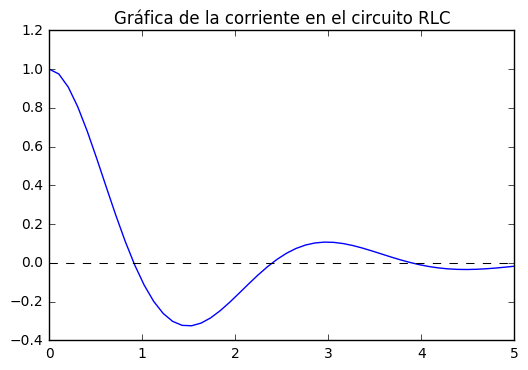

In [11]:
interact(vresistencia, valorR=[0.0, 300.0, 10])